In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('final_test.csv')
df

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [5]:
df.shape

(119734, 4)

In [6]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [7]:
df.isnull()

,weight,age,height,size
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
119729,False,False,False,False
119730,False,False,False,False
119731,False,False,False,False
119732,False,False,False,False


In [8]:
df.isnull().any()

weight    False
age        True
height     True
size      False
dtype: bool

In [9]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [10]:
#I have noticed that we have some missing data regarding the following points (age and height)>> both numerical data
#Therefore we have used .any(), now we need to use dropna to fill the missing ones.

In [94]:
#To handle this we have many ways (6)
#1. delete the rows wih missing valuse by using (Not valid if we have a small dataset)
dataframe.dropna(inplace=True)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna

NameError: name 'dataframe' is not defined

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull()

,weight,age,height,size
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
119729,False,False,False,False
119730,False,False,False,False
119731,False,False,False,False
119732,False,False,False,False


In [13]:
df.isnull().any()
#As we see there are no more missing valuse in the data set (all false)

weight    False
age       False
height    False
size      False
dtype: bool

In [14]:
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [15]:
#OR To fill the missing with new data 
#Apply classifier algorithm 
#1.Mean/ Median /Mode imputation
#2.Random Sample Imputation
#3.Capturing NAN values with a new feature with (0 or 1)
#4.End of Distribution imputation
#5.KNN Imputer
#https://anurodhchoudhary.medium.com/how-to-handle-numerical-missing-values-in-data-with-implementation-7d034884795e#:~:text=Missing%20Data%20can%20occur%20when%20no%20information%20is,to%20as%20NA%20%28Not%20Available%29%20values%20in%20pandas.

In [16]:
#If there is suspicion that the missing value is not at random then capturing that information is important
#therefore we have to make disturbuition for the data before deciding 

In [16]:
df.shape

(119153, 4)

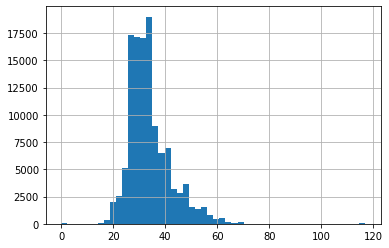

In [17]:
df.age.hist(bins=50)

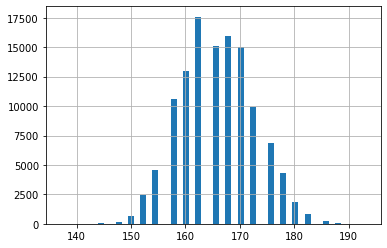

In [18]:
df.height.hist(bins=50)

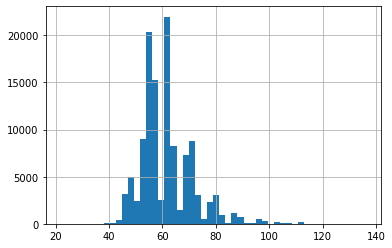

In [19]:
df.weight.hist(bins=50)

In [20]:
#Next step is to work with nun numerical values (size)
#This would be by using LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# label_encoder object
label_encoder =LabelEncoder()
# Encode labels in column. 
df['size']= label_encoder.fit_transform(df['size'])
df.head(10)

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1
5,50,27.0,160.02,2
6,53,65.0,160.02,1
7,51,33.0,160.02,5
8,54,26.0,167.64,1
9,53,32.0,165.10,2


In [23]:
df.tail()

,weight,age,height,size
119729,63,42.0,175.26,1
119730,45,29.0,154.94,2
119731,61,31.0,172.72,1
119732,74,31.0,167.64,3
119733,70,30.0,167.64,3


In [24]:
#Next step is to detect and handle outliers 

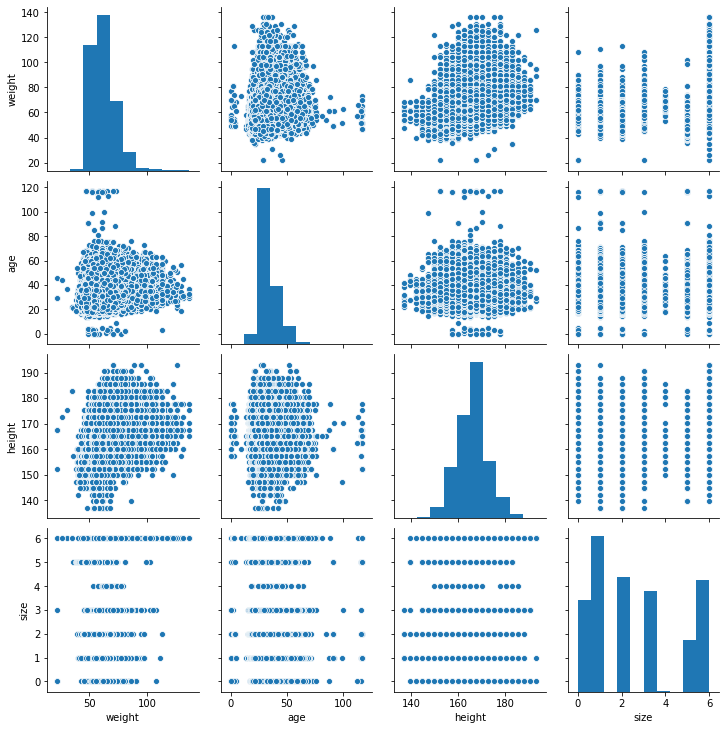

In [26]:
sns.pairplot(df)

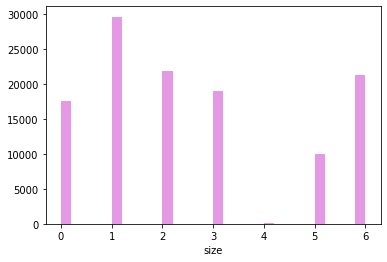

In [25]:
sns.distplot(df['size'],color='m', kde=False, bins=30)

In [26]:
df.size

476612

In [27]:
df["size"].value_counts()

1    29575
2    21829
6    21259
3    19033
0    17481
5     9907
4       69
Name: size, dtype: int64

In [30]:
#The results before the coversion.
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69

SyntaxError: invalid syntax (<ipython-input-30-3929d977270a>, line 2)

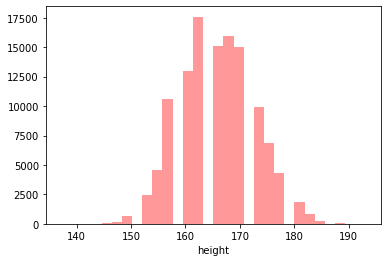

In [28]:
sns.distplot(df['height'],color='r', kde=False, bins=30)

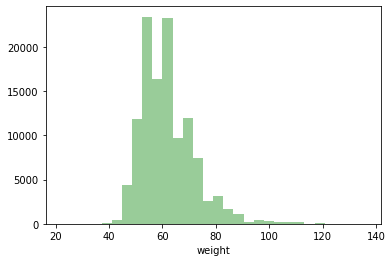

In [29]:
sns.distplot(df['weight'],color='g', kde=False, bins=30)

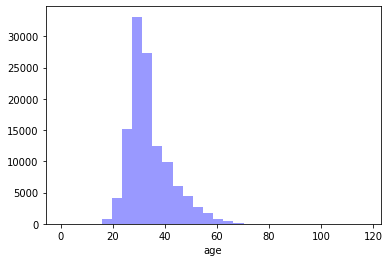

In [30]:
sns.distplot(df['age'],color='b', kde=False, bins=30)

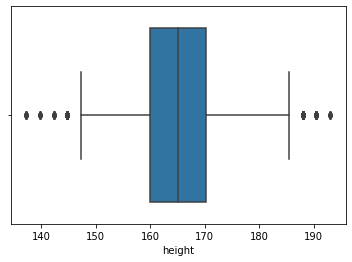

In [31]:
#We have to use Zscore and detect the 4 quartiel, in order to get rid of the outliers
#1st we use boxplot 
sns.boxplot(df['height'])

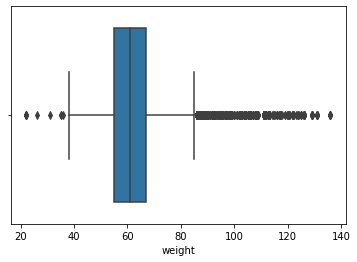

In [32]:
sns.boxplot(df['weight'])

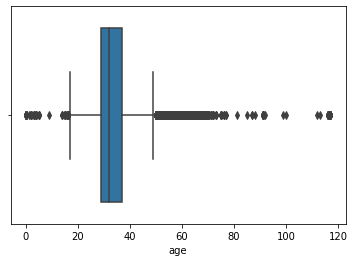

In [33]:
sns.boxplot(df['age'])

In [34]:
#Z score = (x -mean) / std. deviation
x=df[['weight','age','height']]
x

,weight,age,height
0,62,28.0,172.72
1,59,36.0,167.64
2,61,34.0,165.10
3,65,27.0,175.26
4,62,45.0,172.72
...,...,...,...
119729,63,42.0,175.26
119730,45,29.0,154.94
119731,61,31.0,172.72
119732,74,31.0,167.64


In [35]:
y=df[['size']]
y

,size
0,3
1,0
2,1
3,0
4,1
...,...
119729,1
119730,2
119731,1
119732,3


In [36]:
#data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2]
#mean = np.mean(data)
#std = np.std(data)
#print('mean of the dataset is', mean)
#print('std. deviation is', std)
mean=np.mean(df)
std=np.std(df)
print('mean of the data is',mean)
print('std of the data is',std)

mean of the data is weight     61.756095
age        34.032714
height    165.807068
size        2.582369
dtype: float64
std of the data is weight    9.942835
age       8.148268
height    6.737769
size      2.064205
dtype: float64


In [37]:
df.describe()

,weight,age,height,size
count,119153.000000,119153.000000,119153.000000,119153.000000
mean,61.756095,34.032714,165.807068,2.582369
std,9.942877,8.148302,6.737797,2.064213
min,22.000000,0.000000,137.160000,0.000000
25%,55.000000,29.000000,160.020000,1.000000
50%,61.000000,32.000000,165.100000,2.000000
75%,67.000000,37.000000,170.180000,5.000000
max,136.000000,117.000000,193.040000,6.000000


In [38]:
#Z score = (x -mean) / std. deviation
#Hier detecting outliers by std only 
upper_limit_h=df.height.mean() + 3*df.height.std()
print('upper_limit_h is',upper_limit_h)
lower_limit_h=df.height.mean() - 3*df.height.std()
print('lower_limit_h is',lower_limit_h)

upper_limit_h is 186.02045849676333
lower_limit_h is 145.59367727828825


In [39]:
upper_limit_w=df.weight.mean() + 3*df.weight.std()
print('upper_limit_w',upper_limit_w)
lower_limit_w=df.weight.mean() - 3*df.weight.std()
print('lower_limit_w',lower_limit_w)

upper_limit_w 91.58472513278963
lower_limit_w 31.927465076437166


In [40]:
upper_limit_a=df.age.mean() + 3*df.age.std()
print('upper_limit_a is', upper_limit_a)
lower_limit_a=df.age.mean() - 3*df.age.std()
print('lower_limit_a is', lower_limit_a)

upper_limit_a is 58.47762060274043
lower_limit_a is 9.587807879966672


In [41]:
df[(df.age>upper_limit_a) | (df.age<lower_limit_a)]

,weight,age,height,size
6,53,65.0,160.02,1
80,61,69.0,154.94,6
117,81,59.0,162.56,6
130,90,59.0,162.56,6
390,46,59.0,157.48,5
...,...,...,...,...
119425,58,59.0,157.48,3
119515,72,69.0,167.64,6
119538,59,63.0,165.10,6
119622,56,62.0,162.56,1


In [42]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df.head(10)

,weight,age,height,size,zscore
0,62,28.0,172.72,3,1.025993
1,59,36.0,167.64,0,0.272037
2,61,34.0,165.10,1,-0.104941
3,65,27.0,175.26,0,1.402971
4,62,45.0,172.72,1,1.025993
5,50,27.0,160.02,2,-0.858896
6,53,65.0,160.02,1,-0.858896
7,51,33.0,160.02,5,-0.858896
8,54,26.0,167.64,1,0.272037
9,53,32.0,165.10,2,-0.104941


In [43]:
df['zscore']

0         1.025993
1         0.272037
2        -0.104941
3         1.402971
4         1.025993
            ...   
119729    1.402971
119730   -1.612852
119731    1.025993
119732    0.272037
119733    0.272037
Name: zscore, Length: 119153, dtype: float64

In [44]:
#Now let's remove the outliers 
#https://www.youtube.com/watch?v=Vc4cXIAa69Y
def outliers(df, ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR= Q3 - Q1
    
    lower_bound= Q1 - 1.5 * IQR
    upper_bound= Q3 + 1.5 * IQR
    
    st = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return st

In [45]:
index_list=[]
for i in ['height', 'weight', 'age']:
    index_list.extend(outliers(df,i))

In [46]:
#This is list is the outliers 
index_list

[385,
 477,
 2367,
 2603,
 3852,
 3912,
 5986,
 8258,
 8326,
 9236,
 9621,
 9778,
 10239,
 10423,
 10884,
 11254,
 12534,
 13733,
 14681,
 14833,
 15381,
 15553,
 17076,
 18938,
 18956,
 19093,
 19227,
 19326,
 19962,
 20613,
 20617,
 20854,
 21587,
 21961,
 22870,
 22957,
 24456,
 25978,
 26602,
 27175,
 27298,
 27624,
 27747,
 28149,
 28476,
 28852,
 29194,
 30263,
 30515,
 31092,
 32026,
 32286,
 32778,
 34458,
 35705,
 36216,
 37214,
 37354,
 37891,
 38434,
 39116,
 39718,
 40613,
 42078,
 42710,
 42975,
 43087,
 43238,
 43820,
 45254,
 45403,
 45584,
 45874,
 46122,
 47557,
 48480,
 48794,
 49059,
 50082,
 51171,
 51272,
 52412,
 52543,
 53106,
 53422,
 54302,
 54557,
 54900,
 55059,
 55329,
 55365,
 55874,
 56253,
 56662,
 57145,
 57742,
 58385,
 58474,
 59758,
 59994,
 60005,
 60249,
 60405,
 61886,
 62804,
 63034,
 63130,
 63538,
 65552,
 65616,
 66608,
 67116,
 67988,
 68595,
 68980,
 69346,
 70818,
 71031,
 73163,
 75627,
 76187,
 77268,
 77779,
 77849,
 78338,
 79234,
 80341

In [60]:
print("DataFrame shape before delete outliers is. ", df.shape)
for outliers in index_list:
    df.drop(outliers, inplace=True)
print("DataFrame shape after deleting outliers. ",df.shape)

DataFrame shape before delete outliers is.  (118681, 5)


KeyError: '[385] not found in axis'

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [73]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [74]:
from sklearn.datasets import load_iris

In [75]:
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [76]:
models = {
    "KNNR" : KNeighborsClassifier(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
}

In [77]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: KNNR


C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training Score: 0.5284404439688635
Test Score: 0.4742142587386178
------------------------------
Using model: SVR


C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.45219974264979723
Test Score: 0.4477033871523398
------------------------------
Using model: DT
Training Score: 0.5704740361959258
Test Score: 0.43693138828466294
------------------------------
Using model: RF


C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Training Score: 0.5661240245678584
Test Score: 0.46072943063132293
------------------------------


In [71]:
#As we can see the oultiers affect badly on the results!
#But best result goes to RF
model = RandomForestRegressor()

model.fit(x_train, y_train)

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [79]:
print(x_test)

[[-1.8825018   0.48628961 -1.61295496]
 [-0.37814294 -0.37296751 -0.48268336]
 [ 0.12331002 -0.25021649  0.64758825]
 ...
 [ 1.02592533 -0.9867226   0.27083105]
 [-0.37814294 -0.25021649  1.40110265]
 [ 1.02592533  0.60904063  0.27083105]]


In [80]:
y_pred = model.predict(x_test)
y_pred

array([5.        , 1.17221468, 1.26329448, ..., 5.11533962, 1.62922526,
       4.17646679])

In [81]:
y_test

,size
76990,2
38805,1
41265,3
77655,1
59294,2
...,...
94631,0
16919,2
3847,6
39469,1


In [82]:
x.columns

Index(['weight', 'age', 'height'], dtype='object')

In [83]:
#Trying to use a calssifier 
#https://www.activestate.com/resources/quick-reads/how-to-classify-data-in-python/
#Since we have more than 2 values, we need to use Multi-calss classification such as:
#Decision Tree/Random Forest, K-Nearest Neighbors (KNN), Linear Discriminant Analysis, Support Vector Machines (SVMs)
#Since we have already used DT, KNN and SVM previously! so we can try 

In [84]:
# Import libraries and classes required for this example:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [86]:
# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(x_test)

# Print results: 
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

C:\Users\pc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[1335 1161  195  673    0   13  184]
 [1157 2971 1154  397    0  157   62]
 [ 261 1495 1926   68    0  621   11]
 [1060  653   90 1300    0    9  665]
 [   3    1    0    3    0    0    4]
 [  26  350  859    6    0  728    3]
 [ 266  135   23  759    0    4 3043]]
              precision    recall  f1-score   support

           0       0.32      0.37      0.35      3561
           1       0.44      0.50      0.47      5898
           2       0.45      0.44      0.45      4382
           3       0.41      0.34      0.37      3777
           4       0.00      0.00      0.00        11
           5       0.48      0.37      0.42      1972
           6       0.77      0.72      0.74      4230

    accuracy                           0.47     23831
   macro avg       0.41      0.39      0.40     23831
weighted avg       0.48      0.47      0.48     23831



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
from sklearn.metrics import r2_score

print("R2_Score is: ", r2_score(y_test, y_pred).round(4))

R2_Score is:  0.4607


In [ ]:
#The result is very poor which means the model will be very bad in predicting 